In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.layers as tfl
import tensorflow as tf
from keras.utils import image_dataset_from_directory


# Visualisation des données


In [53]:

BATCH_SIZE = 32
IMG_SIZE = (160, 160)
directory = "dataset/"

train_dataset : tf.data.Dataset = image_dataset_from_directory(directory,
                                       shuffle=False,
                                       batch_size=BATCH_SIZE,
                                       image_size=IMG_SIZE,
                                       validation_split=0.2,
                                       subset='training',
                                       seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                       shuffle=False,
                                       batch_size=BATCH_SIZE,
                                       image_size=IMG_SIZE,
                                       validation_split=0.2,
                                       subset='validation',
                                       seed=42)




Found 327 files belonging to 2 classes.
Using 262 files for training.
Found 327 files belonging to 2 classes.
Using 65 files for validation.


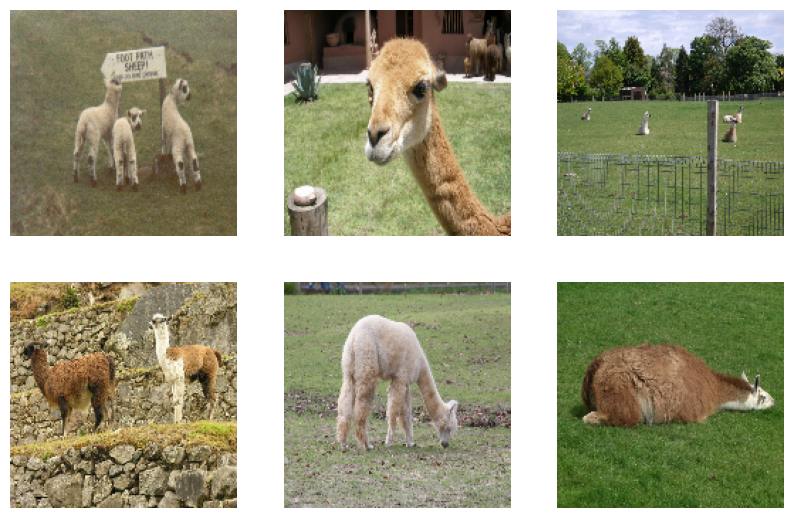

In [61]:
plt.figure(figsize=(10, 10))
for images,labels in train_dataset.take(1):
    
    for i in range(6):
        image = images[i].numpy()
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image.astype('uint8'))
        plt.axis('off')

# Data Augmentation

In [4]:
def data_augmenter():
    '''
    Crée un modèle sequentiel composé de 2 couches
    Retourne: 
        tf.keras.Sequential
    '''
    data_augmentation = keras.Sequential()
    data_augmentation.add(tfl.RandomFlip(mode='horizontal'))
    data_augmentation.add(tfl.RandomRotation(0.2))

    return data_augmentation

Visualisation de la data augmentée



(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)


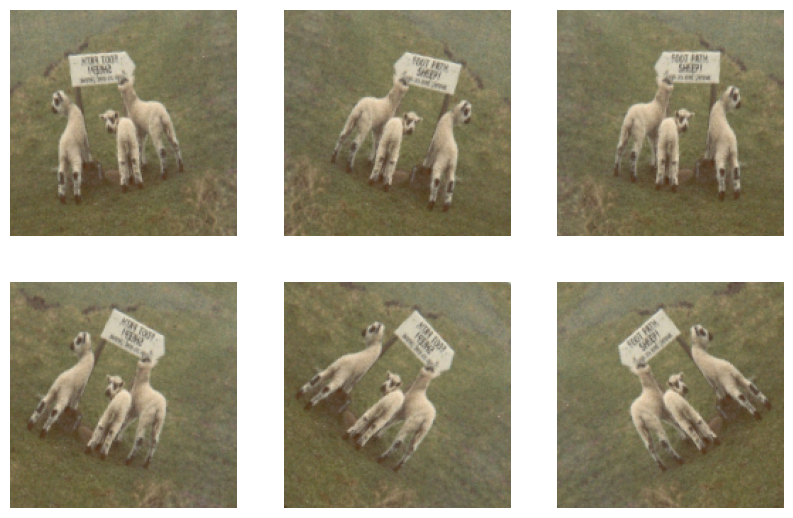

In [80]:

augmenter = data_augmenter()
plt.figure(figsize=(10, 10))
for images,labels in train_dataset.take(1):
    image1 = images[0]
    for i in range(6):
        image = augmenter(image1)
        print(image.shape)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image/255)
        plt.axis('off')